In [1]:
import Integrate_me as IM

### Functions for testing

In [2]:
def f1(x):
    return x 

def f2(x):
    return x**2

def f3(x):
    return x**3

def f4(x, y):
    return x+y

def Gauss(x):
    return 2.71828**(-x**2) 

def S(x, y, z, w):
    value = 0
    if x**2 + y**2 + z**2 + w**2 <=1:
        value = 1
    return value

### Integrator Classes 

In [3]:
F1 = IM.Integrator(f1) #50
F2 = IM.Integrator(f2) #1000/3
F3 = IM.Integrator(f3) #2500
F4 = IM.Integrator(f4) #?
G = IM.Integrator(Gauss)
SPh = IM.Integrator(S)

# Midpoint Rule 

- Uncertainty is as a function of sampled points
- Demonstrate functions that cant be analytically integrated
- Demonstrate convergence and perform timing tests


In [4]:
def retanalysis(C, a, b, Nmax, Ndiffs, intmethod):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()

    nPoints = [2]
    intvalue = [C.NCInt(a, b, nPoints[0], intmethod)]
    time_taken = [time.time()-start_time]

    for i in range(int(Nmax/Ndiffs)):
        npoint = (i+1)*Ndiffs

        start_time = time.time()
        tintvalue = C.NCInt(a, b, npoint, intmethod)
        timepast = time.time() - start_time

        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken]

def plotme(C, a, b, intmethod, Nmax = 500, Ndiffs = 10, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 

    RetAn = C.retanalysis(a, b, Nmax, Ndiffs, intmethod)

    plt.figure(0)
    plt.title('Value of Integral as a function of sample points')
    plt.plot(RetAn[0], RetAn[1])
    plt.show()

    if realvalue != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value')
        RVlst = [(realvalue - i)*100 / realvalue for i in RetAn[1]]
        plt.plot(RetAn[0], RVlst)
        plt.show()

    plt.figure(2)
    plt.title('Timing Test')
    plt.plot(RetAn[0], RetAn[2])
    plt.show()
    #return nPoints

def plotmeval(C, a, b, intmethod, Nmax = 500, Ndiffs = 10, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in one figure.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

    RetAn = C.retanalysis(a, b, Nmax, Ndiffs, intmethod)

    fig = plt.figure(tight_layout=True)
    gs = gridspec.GridSpec(2, 2)
    ax = fig.add_subplot(gs[0, :])
    ax.plot(RetAn[0], RetAn[2])
    ax.set_title('%s for intmethod %s' % (C.f.__name__, intmethod))
    ax.set_ylabel('Time taken (s)')
    ax.set_xlabel('Number of Sample Points')

    if realvalue != None:
        ax = fig.add_subplot(gs[1,1])
        RVlst = [(realvalue - i)*100 / realvalue for i in RetAn[1]]

        ax.plot(RetAn[0], RVlst)
        ax.set_title('Percentage Diffs')
        ax.set_ylabel('Percentage Difference (%)')
        ax.set_xlabel('Number of Sample Points')

        ax = fig.add_subplot(gs[1,0])
    else: 
        ax = fig.add_subplot(gs[1,:])

    ax.plot(RetAn[0], RetAn[1])
    ax.set_title('Integral Values')
    ax.set_ylabel('Value of Integral')
    ax.set_xlabel('Number of Sample Points')

    fig.align_labels()
    plt.show()


In [5]:
plotmeval(F1, 0, 10, 0, realvalue=50)
plotme(F1, 0, 10, 0, realvalue=50)

<Figure size 640x480 with 3 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

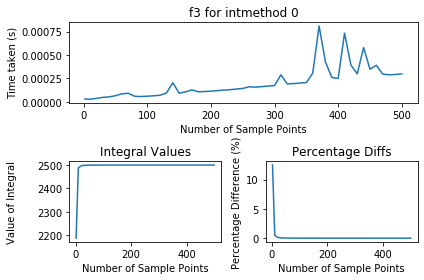

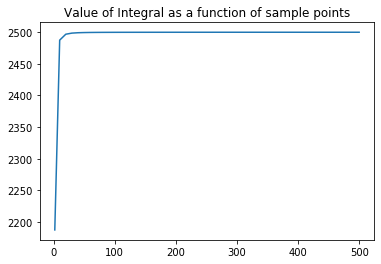

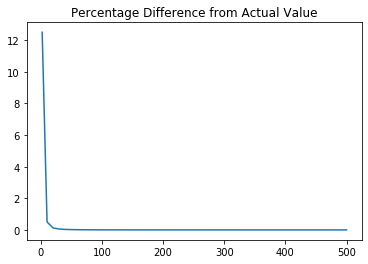

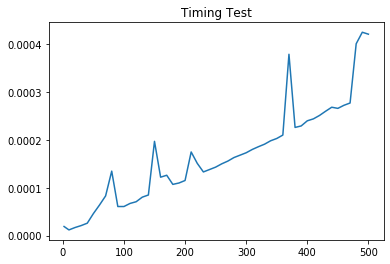

In [6]:
plotmeval(F3, 0, 10, 0, realvalue=2500)
plotme(F3, 0, 10, 0, realvalue=2500)

# Trapezium Rule
- Uncertainty is as a function of sampled points
- Demonstrate functions that cant be analytically integrated
- Demonstrate convergence and perform timing tests

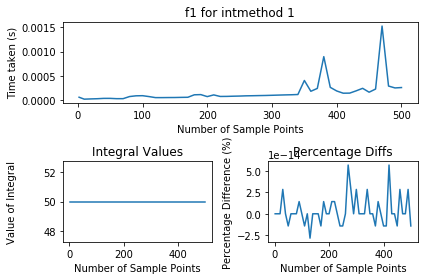

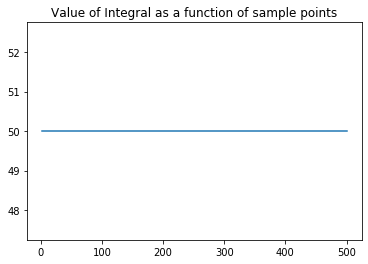

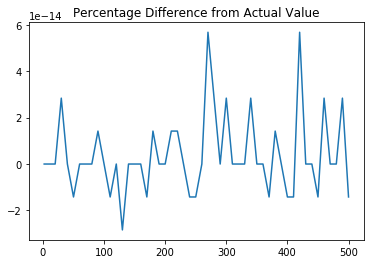

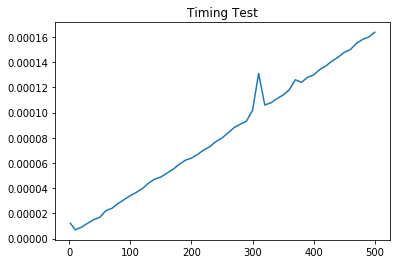

In [7]:
plotmeval(F1, 0, 10, 1, realvalue=50)
plotme(F1, 0, 10, 1, realvalue=50)

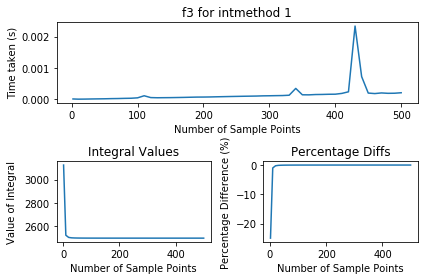

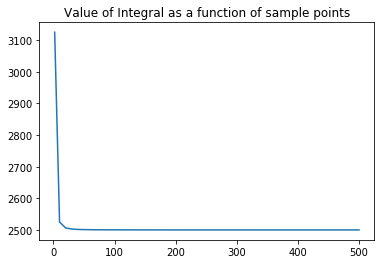

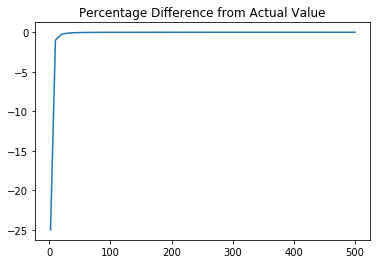

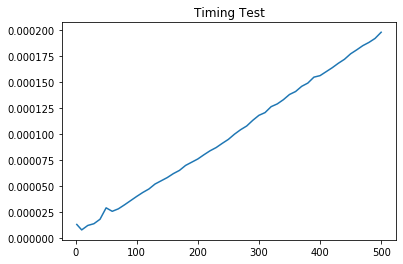

In [8]:
plotmeval(F3, 0, 10, 1, realvalue=2500)
plotme(F3, 0, 10, 1, realvalue=2500)

# Simpsons Rule
- Uncertainty is as a function of sampled points
- Demonstrate functions that cant be analytically integrated
- Demonstrate convergence and perform timing tests

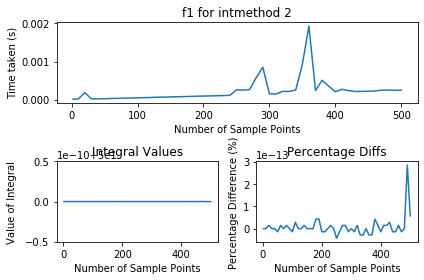

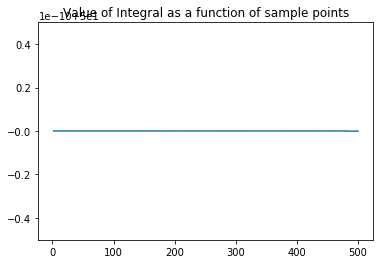

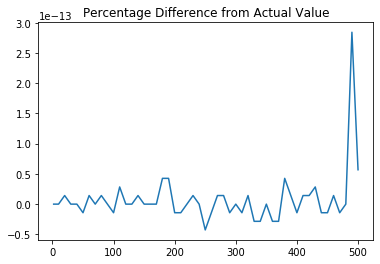

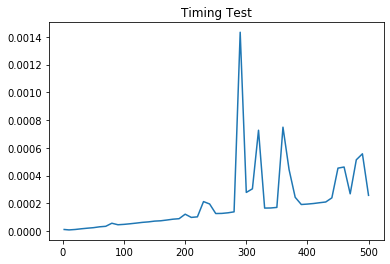

In [9]:
plotmeval(F1, 0, 10, 2, realvalue=50)
plotme(F1, 0, 10, 2, realvalue=50)

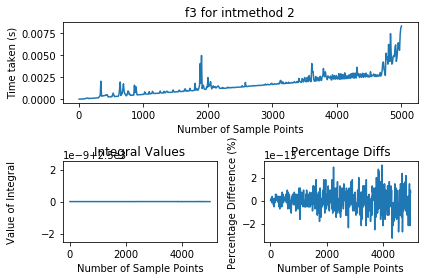

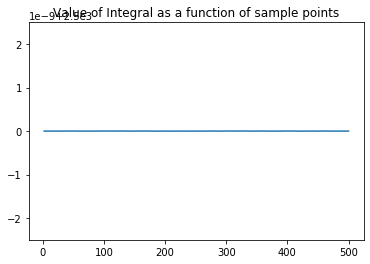

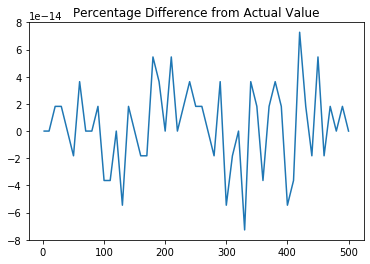

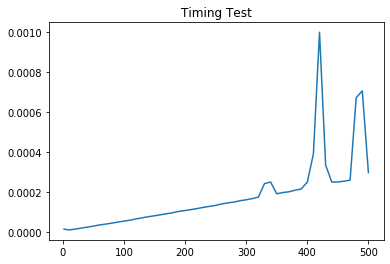

In [10]:
plotmeval(F3, 0, 10, 2, realvalue=2500, Nmax = 5000)
plotme(F3, 0, 10, 2, realvalue=2500)

### Results on the Newton-Cotes

The timing tests between all three Newton-Cotes methods are extremely similar; this makes sense as each of them have the exact same algorithm with only the weights being varied between them. Unsurprisingly, simpsons rule convergest the fastest between the three thingys. 
Interesting things happen when the N transitions between odd and even in simpsons rule. This is very likely due to the presence of the thingy effect, where it becomes unstable as the number of polynomals go up. 
COMPARE EVENS ONLY AND ODD AND EVEN 

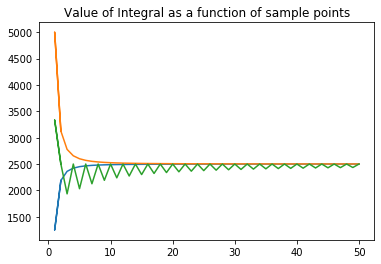

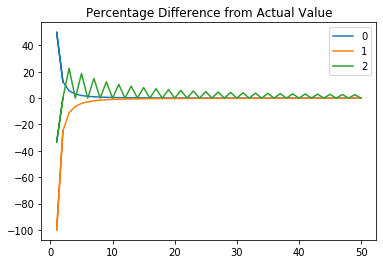

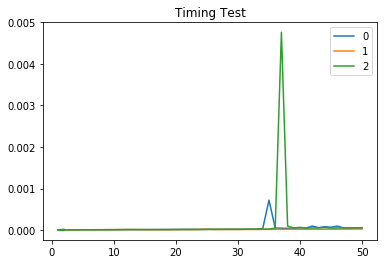

next


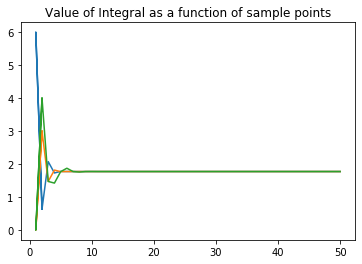

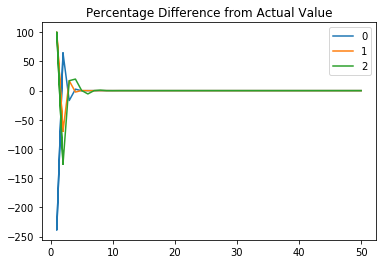

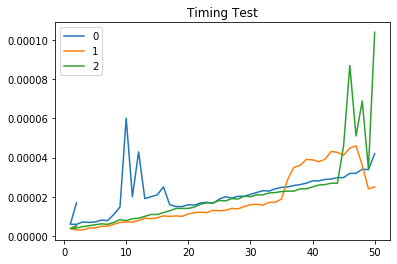

In [11]:
def plotmecombi(C, a, b, Nmax = 500, Ndiffs = 10, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 

    RetAn = [C.retanalysis(a, b, Nmax, Ndiffs, i) for i in range(3)]

    plt.figure(0)
    plt.title('Value of Integral as a function of sample points')
    for i in range(3):
        plt.plot(RetAn[i][0], RetAn[i][1])
    plt.show()

    if realvalue != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value')
        for i in range(3):
            RVlst = [(realvalue - i)*100 / realvalue for i in RetAn[i][1]]
            plt.plot(RetAn[i][0], RVlst, label = str(i))
        plt.legend()
        plt.show()

    plt.figure(2)
    plt.title('Timing Test')
    for i in range(3):
        plt.plot(RetAn[i][0], RetAn[i][2], label = str(i))
    plt.legend()
    plt.show()
    
plotmecombi(F3,0, 10, Nmax = 50, realvalue = 2500, Ndiffs = 1)
print('next')
plotmecombi(G,-3, 3, Nmax = 50, realvalue = 1.7724538509, Ndiffs = 1)

# AdaptiveIntegration Rule
- Uncertainty is as a function of sampled points
- Demonstrate functions that cant be analytically integrated
- Demonstrate convergence and perform timing tests

It converges stupidly fast
to the order of 1e-5 tolerance by less than 20 calls of the integral
converges to 0 in the gaussian integral in like three fukin calls holy sht
however should be careful that the function actually calls something meaningful, eg the extreme case it will not be able to integrate a delta function
Realistically speaking, if the limits are chosen incorrectly, it will not hit the gaussian peak, and would think that the intergal is just 0 
works best for functions that are _not_ flat

In [12]:
def retanalysisadapt(C, a, b, Taumin10to, intmethod):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()
    
    C.j = 0
    nPoints = [1000]
    intvalue = [C.AdaptInt(a, b, nPoints[0], intmethod)]
    J = [C.j]
    time_taken = [time.time()-start_time]

    for i in range(int(3-Taumin10to)):
        npoint = 1000/(5**i)
        C.j = 0
        start_time = time.time()
        tintvalue = C.AdaptInt(a, b, npoint, intmethod)
        timepast = time.time() - start_time
        J.append(C.j)
        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken, J]

def plotmeadapt(C, a, b, intmethod, Taumin10to = -10, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 

    RetAn = retanalysisadapt(C, a, b, Taumin10to, intmethod)

    plt.figure(0)
    plt.title('Value of Integral as a function of sample points based on tolerance')
    plt.plot(RetAn[0], RetAn[1])
    plt.show()

    if realvalue != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value based on tolerance')
        RVlst = [(realvalue - i)*100 / realvalue for i in RetAn[1]]
        plt.plot(RetAn[0], RVlst)
        plt.show()

    plt.figure(2)
    plt.title('Timing Test')
    plt.plot(RetAn[3], RetAn[2])
    plt.show()
    #return nPoints
    plt.figure(3)
    plt.title('calls vs percentagediff')
    plt.plot(RetAn[3], RVlst)

In [13]:
retanalysisadapt(F3, 0, 10, -7, 0)

[[1000, 1000.0, 200.0, 40.0, 8.0, 1.6, 0.32, 0.064, 0.0128, 0.00256, 0.000512],
 [1250.0,
  1250.0,
  2363.28125,
  2476.806640625,
  2494.20166015625,
  2498.8651275634766,
  2499.764058738947,
  2499.957401305437,
  2499.9914368527243,
  2499.9982041344992,
  2499.9996011516146],
 [7.796287536621094e-05,
  0.0012998580932617188,
  0.00014400482177734375,
  0.0007779598236083984,
  0.0005450248718261719,
  0.0017099380493164062,
  0.009229898452758789,
  0.0255279541015625,
  0.03724408149719238,
  0.023479700088500977,
  0.04491591453552246],
 [1, 1, 5, 13, 27, 65, 151, 347, 761, 1629, 3423]]

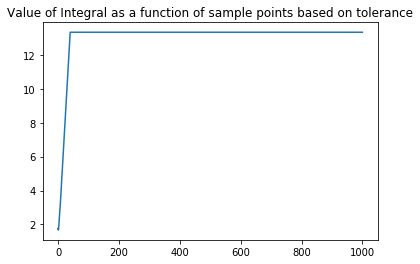

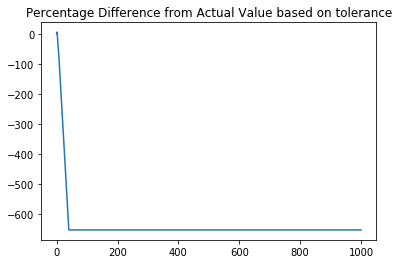

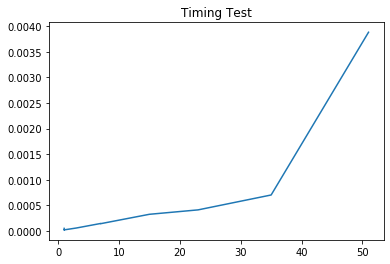

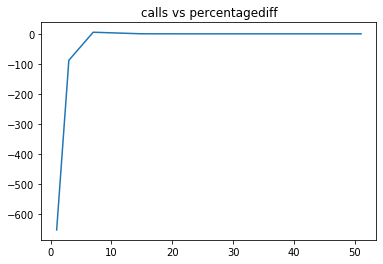

In [14]:
plotmeadapt(G, -10, 10, 2, -7, realvalue= 1.7724538509)

# MonteCarlo Rule
- Uncertainty is as a function of sampled points
- Demonstrate functions that cant be analytically integrated
- Demonstrate convergence and perform timing tests

In [15]:
F1.MonteCarlo(0, 10)

51.41370278623859

In [16]:
def retanalysismonte(C, a, b, Nmax = 500, Ndiffs = 10):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()

    nPoints = [2]
    intvalue = [C.MonteCarlo(a, b, nPoints[0])]
    time_taken = [time.time()-start_time]

    for i in range(int(Nmax/Ndiffs)):
        npoint = (i+1)*Ndiffs

        start_time = time.time()
        tintvalue = C.MonteCarlo(a, b, npoint)
        timepast = time.time() - start_time

        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken]

In [17]:
def plotmemonte(C, a, b, Nmax = 500, Ndiffs = 10, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 
    import numpy as np
    

    RetAn = retanalysismonte(C, a, b, Nmax, Ndiffs)

    plt.figure(0)
    plt.title('Value of Integral as a function of sample points')
    plt.plot(RetAn[0], RetAn[1])
    plt.show()

    if realvalue != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value')
        RVlst = [(realvalue - i)*100 / realvalue for i in RetAn[1]]
        plt.plot(RetAn[0], RVlst)
        plt.show()

    plt.figure(2)
    plt.title('Timing Test')
    plt.plot(RetAn[0], RetAn[2])
    
    Z = np.polyfit(RetAn[0], RetAn[2], 1)
    #plt.figure(3)
    x = np.linspace(RetAn[0][0], RetAn[0][-1], 100)
    p = np.poly1d(Z)
    plt.plot(x, p(x), color='r')
    
    
    plt.show()
    


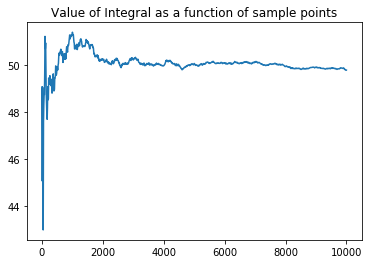

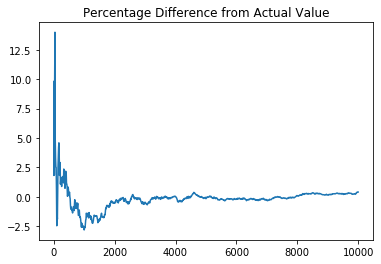

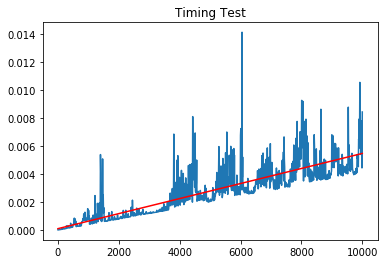

In [18]:
plotmemonte(F1, 0, 10, realvalue=50, Nmax = 10000)

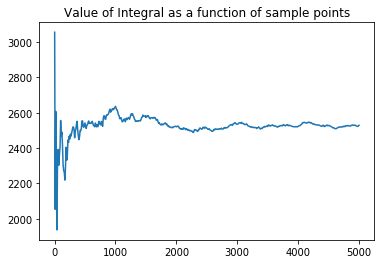

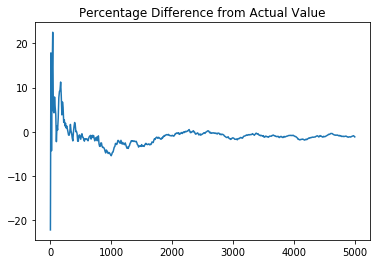

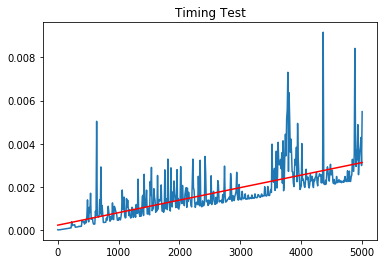

In [19]:
plotmemonte(F3, 0, 10, realvalue=2500, Nmax = 5000)

# N dimensions
- Uncertainty is as a function of sampled points
- Demonstrate functions that cant be analytically integrated
- Demonstrate convergence and perform timing tests

### simpsons (NC)

In [20]:
def retanalysisN(C, a, b, Nmax, Ndiffs, intmethod):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()
    
    nPoints = [2]
    Npoints = [nPoints[0] for i in range(len(a))]
    intvalue = [C.NCIntN(a, b, Npoints, intmethod)]
    time_taken = [time.time()-start_time]

    for i in range(int(Nmax/Ndiffs)):
        npoint = (i+1)*Ndiffs

        start_time = time.time()
        Npoint = [npoint for i in range(len(a))]
        tintvalue = C.NCIntN(a, b, Npoint, intmethod)
        timepast = time.time() - start_time

        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken]

In [21]:
def plotmeN(C, a, b, intmethod, Nmax = 40, Ndiffs = 10, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 

    RetAn = retanalysisN(C, a, b, Nmax, Ndiffs, intmethod)

    plt.figure(0)
    plt.title('Value of Integral as a function of sample points per dimension')
    plt.plot(RetAn[0], RetAn[1])
    plt.show()

    if realvalue != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value vs sample points per dim')
        RVlst = [(realvalue - i)*100 / realvalue for i in RetAn[1]]
        plt.plot(RetAn[0], RVlst)
        plt.show()

    plt.figure(2)
    plt.title('Timing Test vs sample points per dim')
    plt.plot(RetAn[0], RetAn[2])
    plt.show()

In [22]:
retanalysisN(F4,[0,0],[10,10], 50, 10, 2)

[[2, 10, 20, 30, 40, 50],
 [555.5555555555557,
  902.2222222222226,
  950.5555555555555,
  966.9135802469132,
  975.1388888888891,
  980.0888888888891],
 [0.0019359588623046875,
  0.004970073699951172,
  0.016158103942871094,
  0.029107093811035156,
  0.03499794006347656,
  0.05410408973693848]]

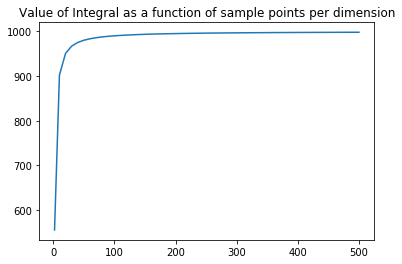

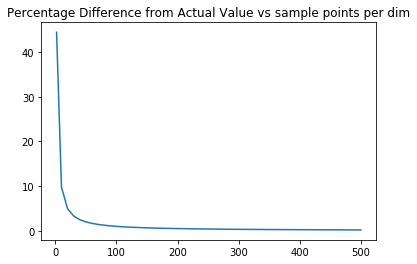

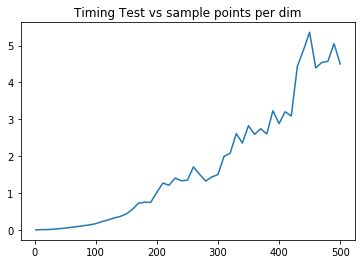

In [23]:
plotmeN(F4, [0,0], [10,10], 2, Nmax = 500,realvalue = 1000)

In [24]:
eval('f4(0,1)')

1

### Adaptive
Lost cause

In [25]:
def retanalysisadaptN(C, a, b, Taumin10to, intmethod):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()

    nPoints = [1000]
    intvalue = [C.AdaptIntN(a, b, nPoints[0], intmethod)]
    time_taken = [time.time()-start_time]

    for i in range(int(3-Taumin10to)):
        npoint = 1000/(10**i)

        start_time = time.time()
        tintvalue = C.AdaptInt(a, b, npoint, intmethod)
        timepast = time.time() - start_time

        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken]

In [26]:
def plotmeadaptN(C, a, b, intmethod, Taumin10to = 500, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 

    RetAn = retanalysisadapt(C, a, b, Taumin10to, intmethod)

    plt.figure(0)
    plt.title('Value of Integral as a function of sample points based on tolerance')
    plt.plot(RetAn[0], RetAn[1])
    plt.show()

    if realvalue != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value based on tolerance')
        RVlst = [(realvalue - i)*100 / realvalue for i in RetAn[1]]
        plt.plot(RetAn[0], RVlst)
        plt.show()

    plt.figure(2)
    plt.title('Timing Test')
    plt.plot(RetAn[0], RetAn[2])
    plt.show()
    #return nPoints

In [27]:
#F4.AdaptIntN([0,0], [10,10], 1e-5, 2)

In [28]:
#retanalysisadapt(F4, [0,0], [10,10], -5, 0)

In [29]:
#plotmeadapt(F4, 0, 10, 0, -5, realvalue= 2500)

### MC

In [30]:
def retanalysismonteN(C, a, b, Nmax = 500, Ndiffs = 10):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()

    nPoints = [2]
    intvalue = [C.MonteCarloN(a, b, nPoints[0])]
    time_taken = [time.time()-start_time]

    for i in range(int(Nmax/Ndiffs)):
        npoint = (i+1)*Ndiffs

        start_time = time.time()
        tintvalue = C.MonteCarloN(a, b, npoint)
        timepast = time.time() - start_time

        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken]

def plotmemonteN(C, a, b, Nmax = 500, Ndiffs = 10, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 

    RetAn = retanalysismonteN(C, a, b, Nmax, Ndiffs)

    plt.figure(0)
    plt.title('Value of Integral as a function of sample points')
    plt.plot(RetAn[0], RetAn[1])
    plt.show()

    if realvalue != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value')
        RVlst = [(realvalue - i)*100 / realvalue for i in RetAn[1]]
        plt.plot(RetAn[0], RVlst)
        plt.show()

    plt.figure(2)
    plt.title('Timing Test')
    plt.plot(RetAn[0], RetAn[2])
    plt.show()

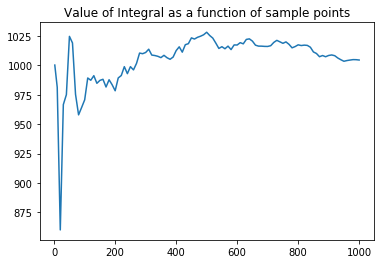

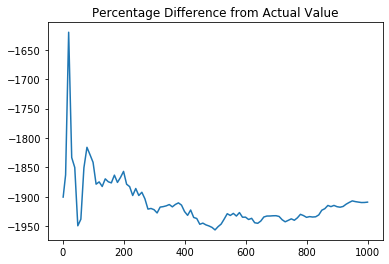

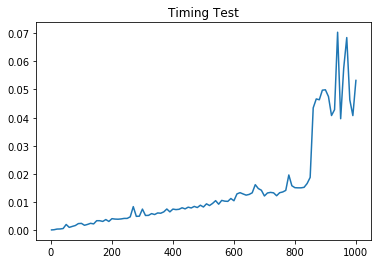

In [31]:
plotmemonteN(F4, [0,0], [10,10], realvalue=50, Nmax = 1000)

# Stratified MonteCarlo
- Uncertainty is as a function of sampled points
- Demonstrate functions that cant be analytically integrated
- Demonstrate convergence and perform timing tests

In [32]:
def retanalysisstrat(C, a, b, Taumin10to, Ninbins = 1000):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    Nmax : int
        Number of maximum intervals for the function to calculate
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    '''
    import time
    start_time = time.time()
    
    nPoints = [1000]
    intvalue = [C.StratSamp(a, b, Ninbin = Ninbins, MaxVar = nPoints[0])]
    J = [C.i]
    time_taken = [time.time()-start_time]

    for i in range(int(3-Taumin10to)):
        npoint = 1000/(10**i)
        C.i = 0
        start_time = time.time()
    
        tintvalue = C.StratSamp(a, b, Ninbin = Ninbins, MaxVar = npoint)
        timepast = time.time() - start_time
        J.append(C.i)
        nPoints.append(npoint)
        intvalue.append(tintvalue)
        time_taken.append(timepast)

    return [nPoints, intvalue, time_taken, J]

def plotmestrat(C, a, b, Taumin10to = -4, realvalue = None):
    '''
    Performs time, convergence, and accuracy test as a function of intervals used
    Uses the Newton-Cotes integration method
    Plots results in two or three separate figures, depending on if realvalue was specified.

    Attributes
    ----------
    a : float 
        lower limit of function
    b : float
        upper limit of function
    intmethod : 0, 1, 2
        Method of choice for integration, per the NCInt method. 
    Ndiffs: int
        Differences between successive intervals tested. eg. if Nmax = 5 and Ndiffs = 2, then those tested 
        are N = 1, 3, 5
    realvalue: float
        The real value of the integral. Used to compare the numerical integration with the analytical one.
    '''
    import matplotlib.pyplot as plt 

    RetAn = retanalysisstrat(C, a, b, Taumin10to)

    plt.figure(0)
    plt.title('Value of Integral as a function of sample points based on tolerance')
    plt.plot(RetAn[0], RetAn[1])
    plt.show()

    if realvalue != None:
        plt.figure(1)
        plt.title('Percentage Difference from Actual Value based on tolerance')
        RVlst = [(realvalue - i)*100 / realvalue for i in RetAn[1]]
        plt.plot(RetAn[0], RVlst)
        plt.show()

    plt.figure(2)
    plt.title('Timing Test')
    plt.plot(RetAn[3], RetAn[2])
    plt.show()
    #return nPoints
    plt.figure(3)
    plt.title('calls vs percentagediff')
    plt.plot(RetAn[3], RVlst)

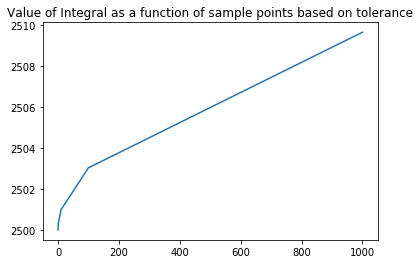

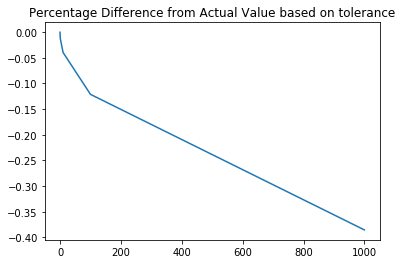

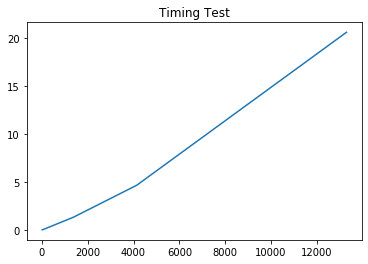

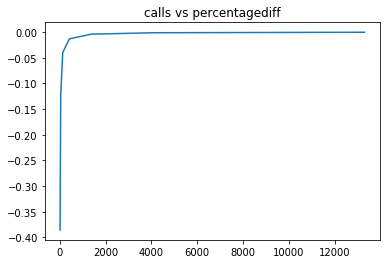

In [33]:
#retanalysisstrat(F3, 0, 10, Taumin10to = -4, Ninbins = 1000)
plotmestrat(F3, 0, 10, realvalue = 2500)

In [34]:
F3.i = 0
F3.StratSamp(0, 10, Nbin = 4, Ninbin = 1000, Nintcheck = 10, MaxVar = 1e-3)
F3.i

13296

# Gaussian

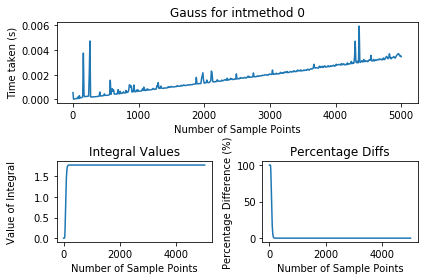

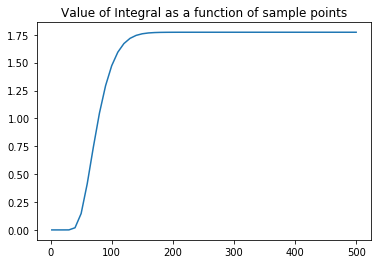

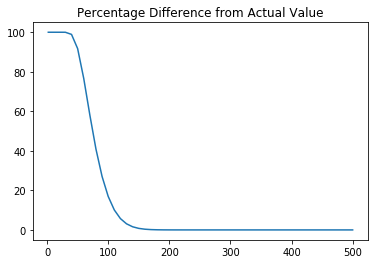

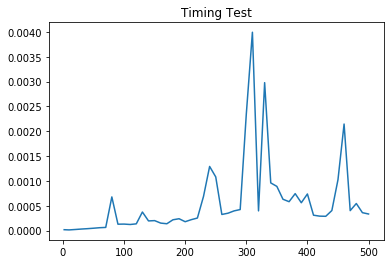

In [35]:
#plotmeval(G, -100, 100, 0, realvalue=1.7724538509, Nmax = 5000)
#plotme(G, -100, 100, 0, realvalue=1.7724538509)

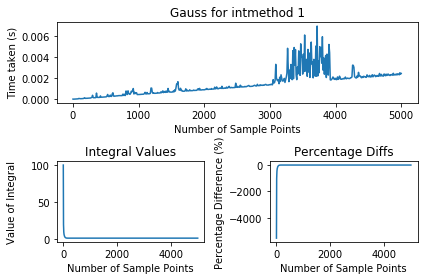

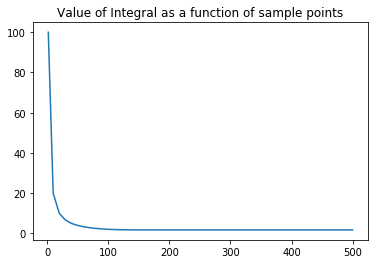

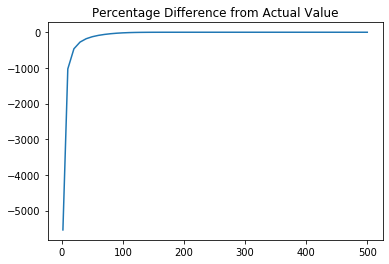

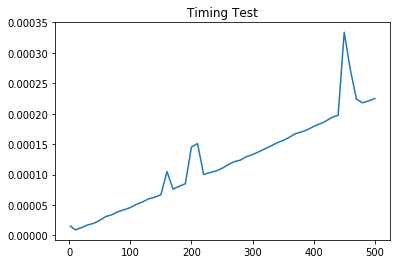

In [36]:
#plotmeval(G, -100, 100, 1, realvalue=1.7724538509, Nmax = 5000)
#plotme(G, -100, 100, 1, realvalue=1.7724538509)

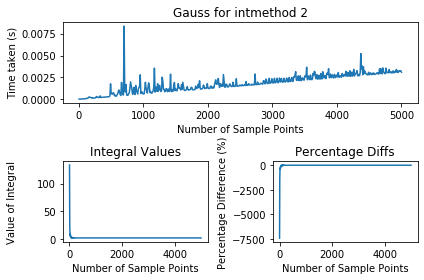

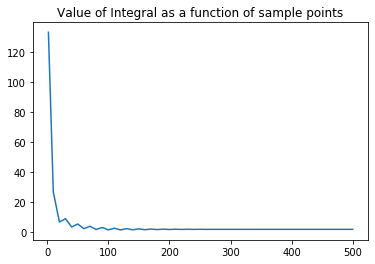

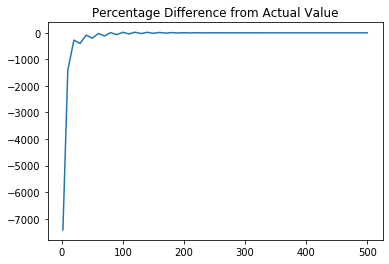

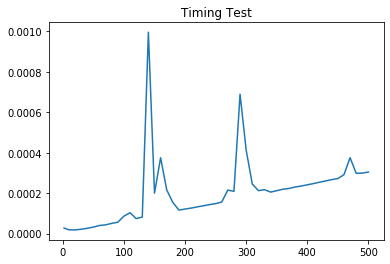

In [37]:
#plotmeval(G, -100, 100, 2, realvalue=1.7724538509, Nmax = 5000)
#plotme(G, -100, 100, 2, realvalue=1.7724538509)

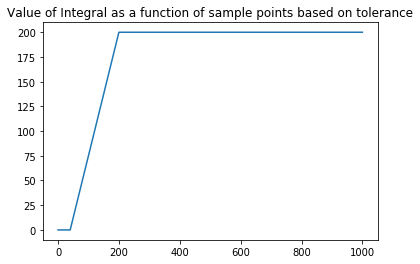

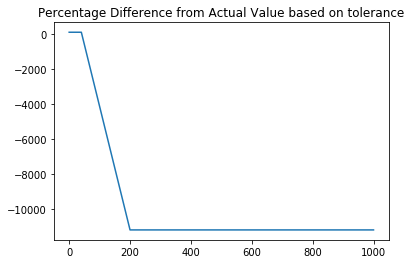

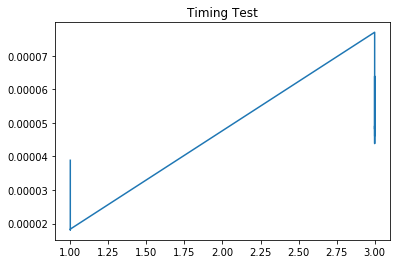

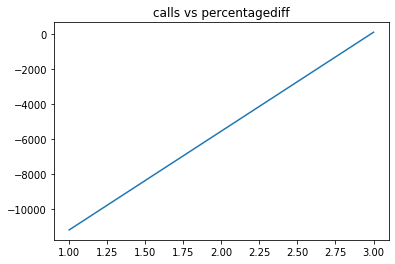

In [38]:
plotmeadapt(G, -100, 100, 0, -5, realvalue= 1.7724538509)

In [48]:
G.AdaptInt(-10, 10, 1e-16, 2)

1.772454447028767

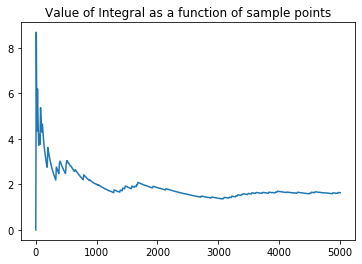

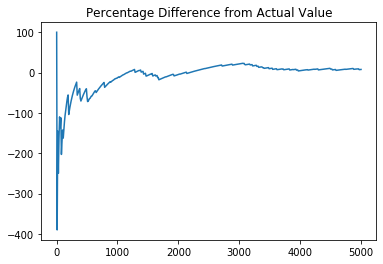

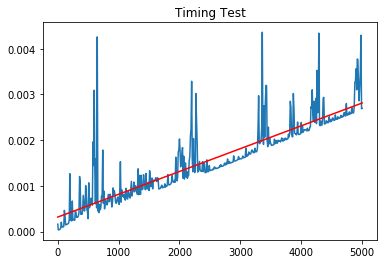

In [49]:
plotmemonte(G, -100, 100, realvalue=1.7724538509, Nmax = 5000)

# Hypersphere

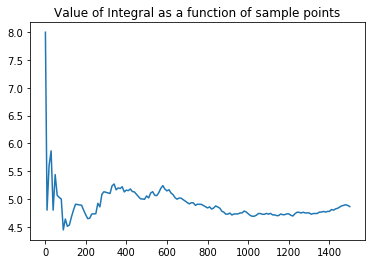

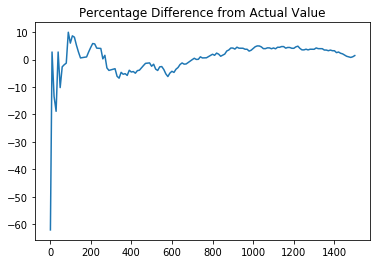

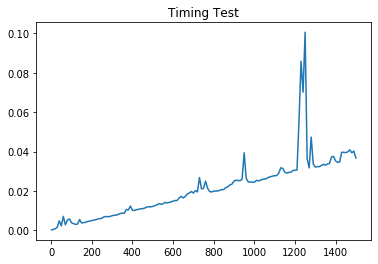

In [50]:
plotmemonteN(SPh, [-1, -1, -1, -1], [1, 1, 1, 1], realvalue=4.9348022005, Nmax = 1500) 

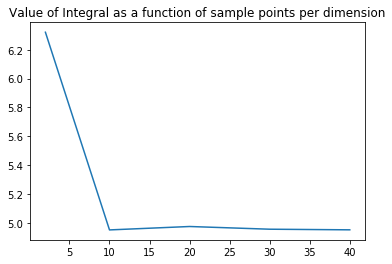

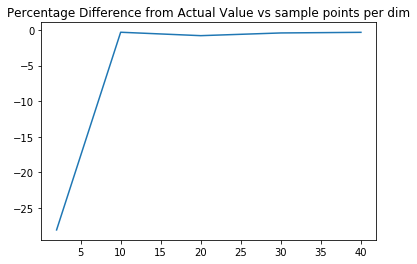

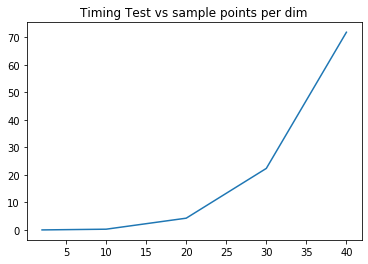

In [51]:
plotmeN(SPh, [-1, -1, -1, -1], [1, 1, 1, 1], 2, realvalue=4.9348022005)

In [52]:
SPh.NCIntN(A=[-1, -1, -1, -1], B=[1, 1, 1, 1],N = [30, 30, 30, 30], kind=2)

4.9554982472150035